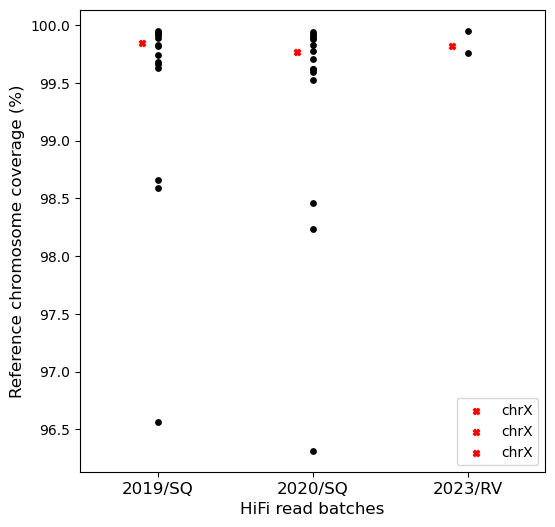

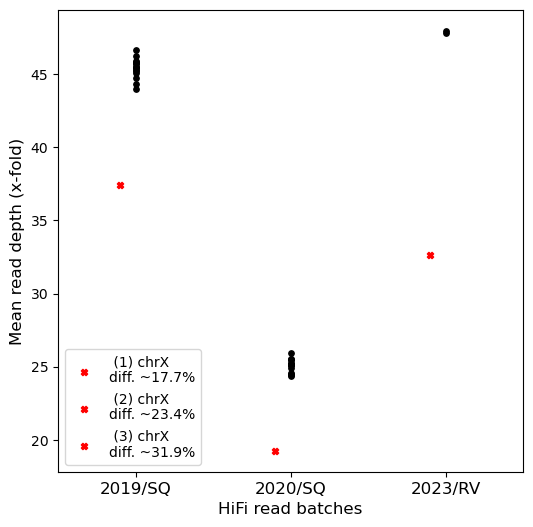

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib as pl
import pandas as pd

top_folder = pl.Path("/home/ebertp/work/projects/hgsvc/2024_dropouts")

cov_data = []
for cov_file in top_folder.glob("*cov.txt"):
    df = pd.read_csv(cov_file, sep="\t", header=0)
    batch = cov_file.name.split(".")[0].split("_")[-1]
    sample = cov_file.name.split("_")[0]
    df.rename(columns={"#rname": "chrom"}, inplace=True)
    df = df.loc[df["meandepth"] > 0, :].copy()
    df["batch"] = int(batch.strip("batch"))
    df = df[["chrom", "batch", "coverage", "meandepth"]].copy()
    cov_data.append(df)
    
cov_data = pd.concat(cov_data, axis=0, ignore_index=False)

batches = list(range(1,4))

fig, ax = plt.subplots(figsize=(6,6))
for batch in batches:
    select_batch = cov_data["batch"] == batch
    select_notx = cov_data["chrom"] != "chrX"
    select_both = select_batch & select_notx
    batch_data = cov_data.loc[select_both, "coverage"].values
    ax.scatter(
        [batch] * batch_data.size,
        batch_data,
        color="black",
        s=15
    )
    
    select_x = cov_data["chrom"] == "chrX"
    select_both = select_batch & select_x
    value_x = cov_data.loc[select_both, "coverage"]
    ax.scatter(
        [batch-0.1],
        value_x,
        color="red",
        marker="X",
        s=20,
        label="chrX"
    )
    ax.set_ylabel("Reference chromosome coverage (%)", fontsize=12)
    ax.set_xlabel("HiFi read batches", fontsize=12)
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(["2019/SQ", "2020/SQ", "2023/RV"], fontsize=12)
    ax.set_xlim(0.5, 3.5)
    ax.legend(loc="best")


fig, ax = plt.subplots(figsize=(6,6))
for batch in batches:
    select_batch = cov_data["batch"] == batch
    select_notx = cov_data["chrom"] != "chrX"
    select_both = select_batch & select_notx
    batch_data = cov_data.loc[select_both, "meandepth"].values
    ax.scatter(
        [batch] * batch_data.size,
        batch_data,
        color="black",
        s=15
    )
    batch_data.sort()
    median = batch_data[batch_data.size//2]
    
    select_x = cov_data["chrom"] == "chrX"
    select_both = select_batch & select_x
    value_x = cov_data.loc[select_both, "meandepth"]
    pct_diff = (round(value_x / median * 100, 2)).iloc[0]
    pct_diff = round(100-pct_diff, 1)
    ax.scatter(
        [batch-0.1],
        value_x,
        color="red",
        marker="X",
        s=20,
        label=f" ({batch}) chrX\ndiff. ~{pct_diff}%"
    )
    ax.set_ylabel("Mean read depth (x-fold)", fontsize=12)
    ax.set_xlabel("HiFi read batches", fontsize=12)
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(["2019/SQ", "2020/SQ", "2023/RV"], fontsize=12)
    ax.set_xlim(0.5, 3.5)
    ax.legend(loc="best")